In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

/usr/lib/python3/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv("train.csv",
                    header=0,
                    usecols=["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch"],
                    index_col="PassengerId")

In [3]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,male,22.0,1,0
2,1,1,female,38.0,1,0
3,1,3,female,26.0,0,0
4,1,1,female,35.0,1,0
5,0,3,male,35.0,0,0


In [4]:
train["Gender"] = [0 if _ == "female" else 1 for _ in train.Sex]

In [5]:
train["Relationship"] = [0 if train.SibSp[_] + train.Parch[_] == 0 else 1 for _ in range(1, train.shape[0] + 1)]

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Gender,Relationship
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,1,1
2,1,1,female,38.0,1,0,0,1
3,1,3,female,26.0,0,0,0,0
4,1,1,female,35.0,1,0,0,1
5,0,3,male,35.0,0,0,1,0


In [7]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Gender,Relationship
PassengerId,,,,,,,,
887,0,2,male,27.0,0,0,1,0
888,1,1,female,19.0,0,0,0,0
889,0,3,female,NaN,1,2,0,1
890,1,1,male,26.0,0,0,1,0
891,0,3,male,32.0,0,0,1,0


In [8]:
train["InAge"] = [1 if _ in range(15, 46) else 0 for _ in train.Age]

In [9]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Gender,Relationship,InAge
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,1,1,1
2,1,1,female,38.0,1,0,0,1,1
3,1,3,female,26.0,0,0,0,0,1
4,1,1,female,35.0,1,0,0,1,1
5,0,3,male,35.0,0,0,1,0,1


In [10]:
train.drop(["Sex", "Age", "SibSp", "Parch"], axis=1, inplace=True)

In [11]:
train.head()

,Survived,Pclass,Gender,Relationship,InAge
PassengerId,,,,,
1,0,3,1,1,1
2,1,1,0,1,1
3,1,3,0,0,1
4,1,1,0,1,1
5,0,3,1,0,1


In [12]:
X = train.loc[:, ["Pclass", "Gender", "Relationship", "InAge"]]
y = train.Survived

In [13]:
log = LogisticRegression()
print(cross_val_score(log, X, y, cv=10, scoring="accuracy").mean())

0.783364828056


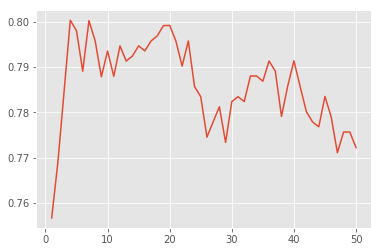

In [14]:
%matplotlib inline
plt.style.use("ggplot")
scores = []
for _ in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=_)
    scores.append(cross_val_score(knn, X, y, cv=10, scoring="accuracy").mean())
plt.plot(range(1, 51), scores)
plt.show()

In [15]:
scores.index(max(scores))

3

In [16]:
max(scores)

0.80032005447735788

In [17]:
scores[3]

0.80032005447735788

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
test = pd.read_csv("test.csv",
                    header=0,
                    usecols=["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch"])

In [20]:
test["Gender"] = [0 if _ == "female" else 1 for _ in test.Sex]
test["Relate"] = test.SibSp + test.Parch
test["Relationship"] = [0 if _ == 0 else 1 for _ in test.Relate]
test["InAge"] = [1 if _ in range(15, 46) else 0 for _ in test.Age]
test.drop(["Sex", "Age", "SibSp", "Parch", "Relate"], axis=1, inplace=True)

In [21]:
test.head()

,PassengerId,Pclass,Gender,Relationship,InAge
0,892,3,1,0,0
1,893,3,0,1,0
2,894,2,1,0,0
3,895,3,1,0,1
4,896,3,0,1,1


In [22]:
X_pred = test.loc[:, ["Pclass", "Gender", "Relationship", "InAge"]]

In [23]:
y_pred = knn.predict(X_pred)

In [24]:
df = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": y_pred}).set_index("PassengerId")
df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [25]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier()
print(cross_val_score(ranfor, X, y, cv=10, scoring="accuracy").mean())

0.787971853365


In [26]:
ranfor.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y_pred = ranfor.predict(X_pred)

In [28]:
df = pd.DataFrame({"PassengerId": test.PassengerId, "Survived": y_pred}).set_index("PassengerId")
df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [29]:
df.to_csv("submission.csv")